 Logistic regression fits a special s-shaped curve by taking the linear regression function and transforming the numeric estimate into a probability with the following function, which is called the sigmoid function 𝜎:

$$
ℎ\_\theta(𝑥) = \sigma({\theta^TX}) =  \frac {e^{(\theta\_0 + \theta\_1  x\_1 + \theta\_2  x\_2 +...)}}{1 + e^{(\theta\_0 + \theta\_1  x\_1 + \theta\_2  x\_2 +\cdots)}}
$$
Or:
$$
ProbabilityOfaClass\_1 =  P(Y=1|X) = \sigma({\theta^TX}) = \frac{e^{\theta^TX}}{1+e^{\theta^TX}}
$$

In this equation, ${\theta^TX}$ is the regression result (the sum of the variables weighted by the coefficients), `exp` is the exponential function and $\sigma(\theta^TX)$ is the sigmoid or [logistic function](http://en.wikipedia.org/wiki/Logistic_function?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01), also called logistic curve. It is a common "S" shape (sigmoid curve).

So, briefly, Logistic Regression passes the input through the logistic/sigmoid but then treats the result as a probability:

<img
src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/images/mod_ID_24_final.png" width="400" align="center">

In [41]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt
from fetch_request import download

In [42]:
path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/ChurnData.csv"
await download(path, "ChurnData.csv")
df = pd.read_csv("data/ChurnData.csv")

In [43]:
df = df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip', 'callcard', 'wireless', 'churn']]
df['churn'] = df['churn'].astype('int')
df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0


In [44]:
X = np.asanyarray(df.drop(['churn', 'callcard', 'wireless'], axis=1))
X[0:5]

array([[ 11.,  33.,   7., 136.,   5.,   5.,   0.],
       [ 33.,  33.,  12.,  33.,   2.,   0.,   0.],
       [ 23.,  30.,   9.,  30.,   1.,   2.,   0.],
       [ 38.,  35.,   5.,  76.,   2.,  10.,   1.],
       [  7.,  35.,  14.,  80.,   2.,  15.,   0.]])

In [45]:
y = np.asanyarray(df['churn'])
y[0:5]

array([1, 1, 0, 0, 0])

In [46]:
from sklearn import preprocessing

X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-1.14, -0.63, -0.46,  0.48,  1.7 , -0.58, -0.86],
       [-0.12, -0.63,  0.03, -0.33, -0.64, -1.14, -0.86],
       [-0.58, -0.86, -0.26, -0.35, -1.42, -0.92, -0.86],
       [ 0.12, -0.47, -0.66,  0.01, -0.64, -0.03,  1.16],
       [-1.32, -0.47,  0.23,  0.04, -0.64,  0.53, -0.86]])

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=34)
print(f'Train set: {X_train.shape}, {y_train.shape}')
print(f'Test set: {X_test.shape}, {y_test.shape}')

Train set: (160, 7), (160,)
Test set: (40, 7), (40,)


### Logistic Regression with Sci-kit
This function implements logistic regression and can use different numerical optimizers to find parameters, including ‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’ solvers. You can find extensive information about the pros and cons of these optimizers if you search it in the internet.


The version of Logistic Regression in Scikit-learn, support regularization. Regularization is a technique used to solve the overfitting problem of machine learning models.
**C** parameter indicates **inverse of regularization strength** which must be a positive float. Smaller values specify stronger regularization.
Now let's fit our model with train set:


In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

LR = LogisticRegression(C=.01, solver='liblinear').fit(X_train,y_train)

In [49]:
y_hat = LR.predict(X_test)
y_hat

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1])

In [50]:
y_hat_prob = LR.predict_proba(X_test)
y_hat_prob

array([[0.52, 0.48],
       [0.69, 0.31],
       [0.7 , 0.3 ],
       [0.71, 0.29],
       [0.68, 0.32],
       [0.65, 0.35],
       [0.66, 0.34],
       [0.43, 0.57],
       [0.57, 0.43],
       [0.69, 0.31],
       [0.59, 0.41],
       [0.43, 0.57],
       [0.67, 0.33],
       [0.64, 0.36],
       [0.66, 0.34],
       [0.6 , 0.4 ],
       [0.65, 0.35],
       [0.51, 0.49],
       [0.41, 0.59],
       [0.53, 0.47],
       [0.56, 0.44],
       [0.51, 0.49],
       [0.58, 0.42],
       [0.45, 0.55],
       [0.62, 0.38],
       [0.58, 0.42],
       [0.54, 0.46],
       [0.43, 0.57],
       [0.42, 0.58],
       [0.48, 0.52],
       [0.48, 0.52],
       [0.6 , 0.4 ],
       [0.58, 0.42],
       [0.52, 0.48],
       [0.48, 0.52],
       [0.48, 0.52],
       [0.77, 0.23],
       [0.53, 0.47],
       [0.47, 0.53],
       [0.45, 0.55]])

#### Jaccard's index

In [51]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, y_hat)

0.29411764705882354

In [52]:
from sklearn.metrics import classification_report
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))   
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

[[ 5  5]
 [ 7 23]]
[[ 5  5]
 [ 7 23]]


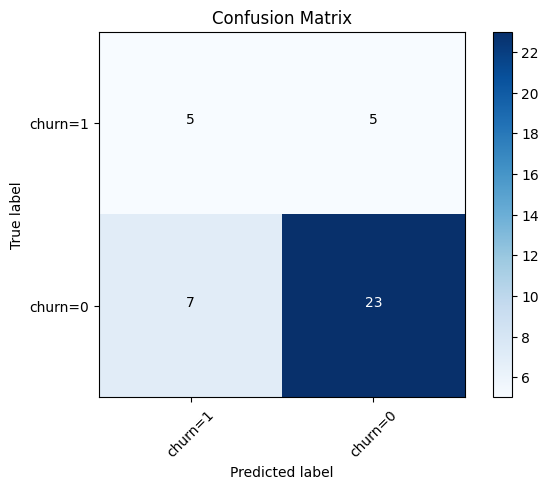

In [53]:
cnf_matrix = confusion_matrix(y_test, y_hat, labels=[1,0])
print(cnf_matrix)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'], normalize= False,  title='Confusion Matrix')


*   **Precision** is a measure of the accuracy provided that a class label has been predicted. It is defined by: precision = TP / (TP + FP)

*   **Recall** is the true positive rate. It is defined as: Recall =  TP / (TP + FN)

So, we can calculate the precision and recall of each class.

**F1 score:**

Harmonic average of the precision and recall, where an F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0. It is a good way to show that a classifer has a good value for both recall and precision.

Finally, we can tell the average accuracy for this classifier is the average of the F1-score for both labels, which is 0.72 in our case.

In [54]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.82      0.77      0.79        30
           1       0.42      0.50      0.45        10

    accuracy                           0.70        40
   macro avg       0.62      0.63      0.62        40
weighted avg       0.72      0.70      0.71        40



### Log loss

In [55]:
from sklearn.metrics import log_loss
log_loss(y_test, y_hat_prob)

0.6027579459621973

In [56]:
LR2 = LogisticRegression(C=.01, solver='sag').fit(X_train,y_train)
y_hat_prob2 = LR2.predict_proba(X_test)
log_loss(y_test, y_hat_prob2)

0.5261272052006136